In [1]:
import sklearn

sklearn.__version__


'1.7.2'

In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
def fetch_housing_data(Housing_url , Housing_path):
    if not os.path.isdir(Housing_path):
        os.makedirs(Housing_path)

    tgz_path = os.path.join(Housing_path , "housing.tgz")
    urllib.request.urlretrieve(Housing_url , tgz_path)
    tgz_file = tarfile.open(tgz_path)
    tgz_file.extractall(path = Housing_path , filter = "fully_trusted")
    tgz_file.close()

In [3]:
Download_root =  "https://raw.githubusercontent.com/ageron/handson-ml/master/"
Housing_path = os.path.join("datasets","housing","")
Housing_url = Download_root + "datasets/housing/housing.tgz"


In [8]:
#dont run again it will start to download again 
fetch_housing_data(Housing_url , Housing_path)

In [4]:
import pandas as pd

def load_housing_data(Housing_path = Housing_path):
    housing_csv_path = os.path.join(Housing_path , "housing.csv")
    return pd.read_csv(housing_csv_path)

In [5]:
housing_data = load_housing_data()
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


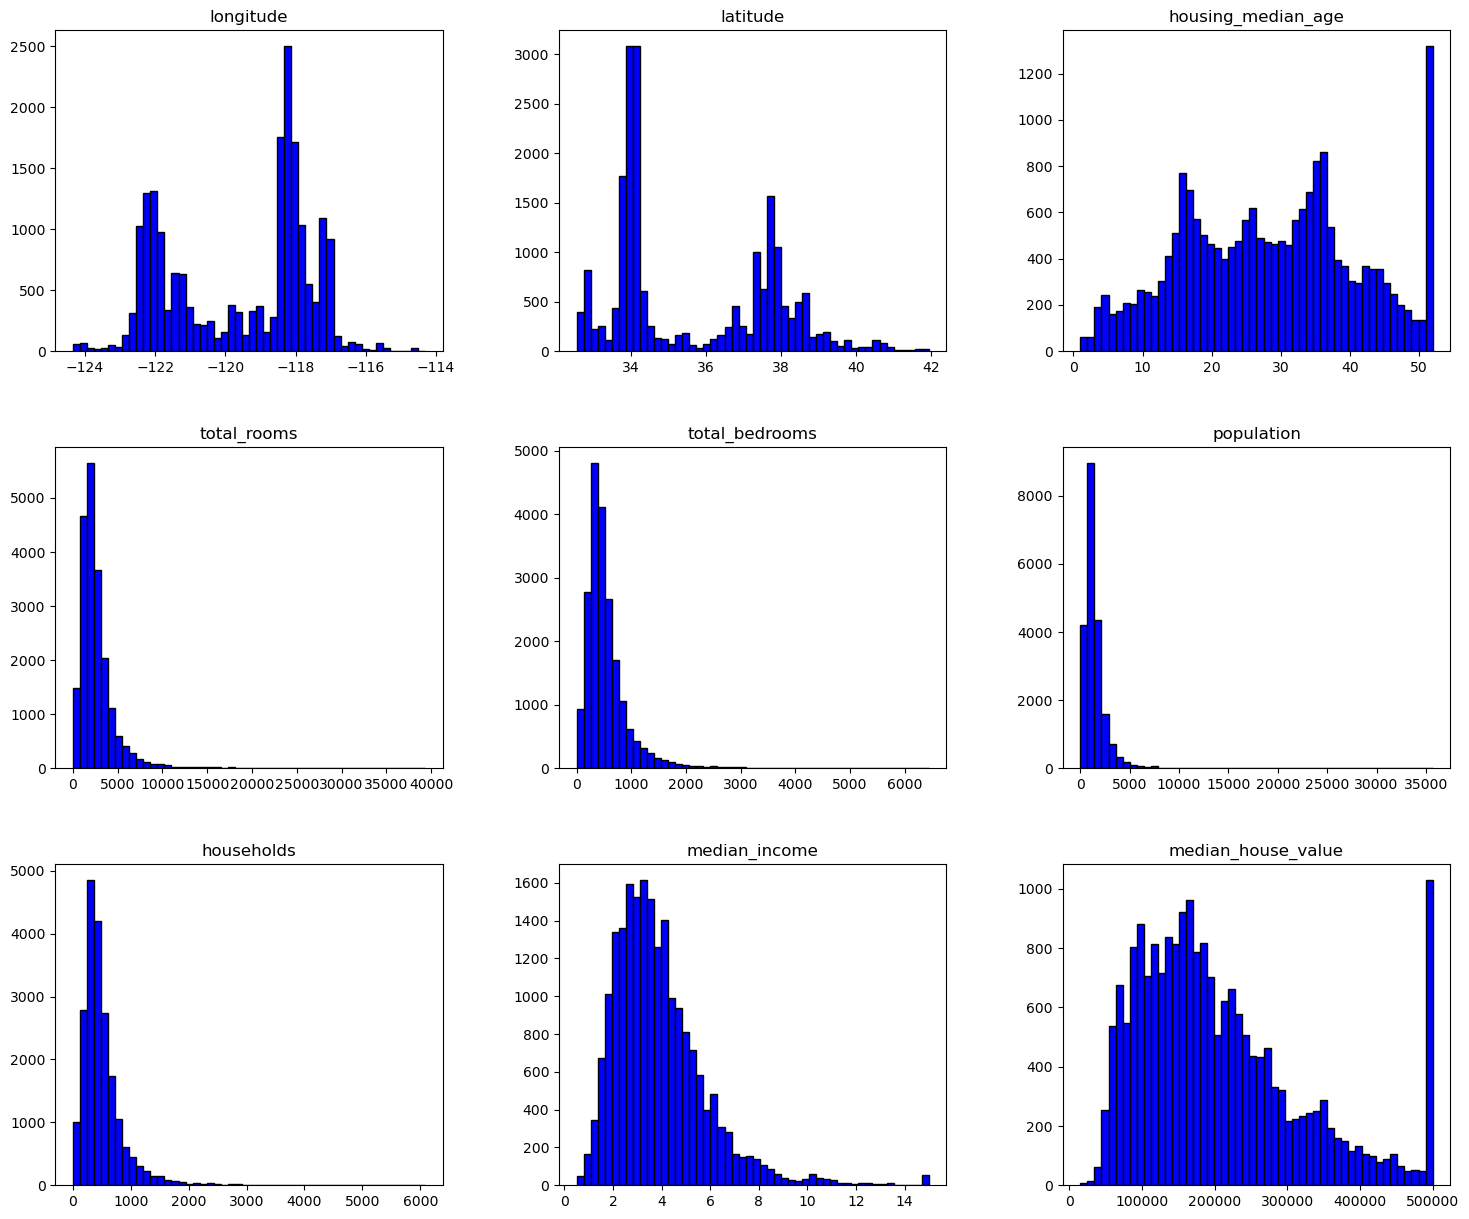

In [9]:
import matplotlib.pyplot as plt

housing_data.hist(bins = 50 , figsize = (18 ,15),color = "blue", edgecolor = "black" , grid = False )
plt.show()

In [10]:
# creating test set 
import numpy as np
def split_train_test(data , test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio )
    test_sample_indices = shuffled_indices[ : test_size ]
    train_sample_indices = shuffled_indices[test_size : ]

    return data.iloc[train_sample_indices] , data.iloc[test_sample_indices]

In [11]:
train_set , test_set = split_train_test(housing_data , 0.2)
print(f"length of train data = {len(train_set)}" , f"length of train data = {len(test_set)}" , sep = "\n")

length of train data = 16512
length of train data = 4128


In [12]:
housing_with_id = housing_data.reset_index() #housing_with_id has has col named index so using that for hash function
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
import hashlib

def test_set_check(identifier , test_ratio , hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test_by_id(data , test_ratio , id_column , hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ :test_set_check(id_ , test_ratio , hash))
    return data.loc[~in_test_set] , data.loc[in_test_set]
    

In [14]:
# here we are hashing with index which forces us to append new data only at the end  
train_set , test_set = split_train_test_by_id(housing_with_id , 0.2 , "index" )

print(f"{len(train_set)} , {len(test_set)}")

16362 , 4278


In [15]:
# so instead of index and we also dont have any unique id so w can use the most stable features to build a unique identifier , in this case that is latitude and longitude

housing_with_id["id"] = housing_data["longitude"] *1000 + housing_data["latitude"] 
train_set , test_set = split_train_test_by_id(housing_with_id , 0.2 , "id" )

print(f"{len(train_set)} , {len(test_set)}")

16267 , 4373


In [16]:
# spliting usig in sklearn in built function
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing_data , test_size = 0.2 , random_state = 42 )
print(f"{len(train_set)} , {len(test_set)}")

16512 , 4128


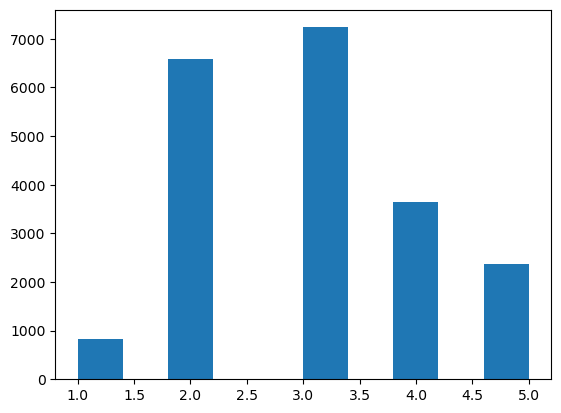

In [17]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

housing_data["income_cat"] = np.ceil(housing_data["median_income"] / 1.5 )
housing_data["income_cat"].where(housing_data["income_cat"] < 5 , 5.0 , inplace = True)
plt.hist(housing_data["income_cat"])
plt.show()



In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]



In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [20]:
for set_ in (strat_train_set , strat_test_set):
    set_.drop("income_cat" ,axis = 1, inplace = True)
    

In [21]:
housing = strat_train_set.copy()

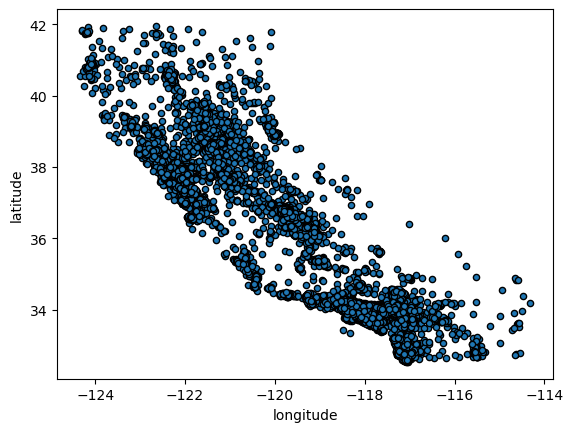

(16512, 10)

In [22]:
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude" ,edgecolor = "black")
plt.show()
housing.shape

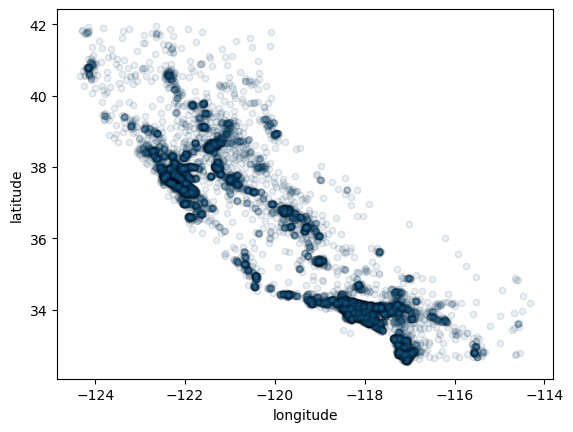

In [23]:
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude"  ,alpha = 0.1 ,edgecolor = "black")
plt.show()

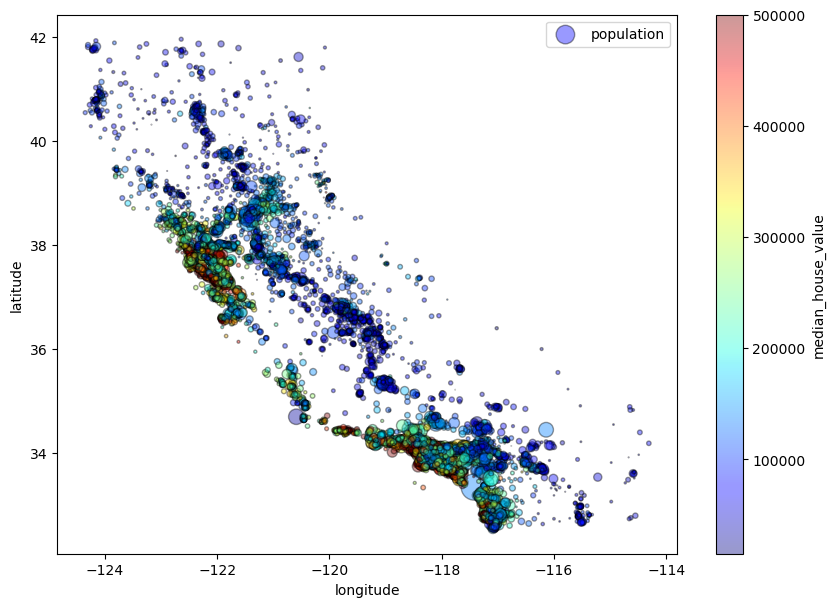

In [24]:
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude" ,edgecolor = "black" , alpha = 0.4 , s = housing["population"] / 100 ,cmap = plt.get_cmap("jet") , c = "median_house_value" , label = "population" , figsize = (10,7) ,  colorbar = "black")
plt.legend()
plt.show()

In [25]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

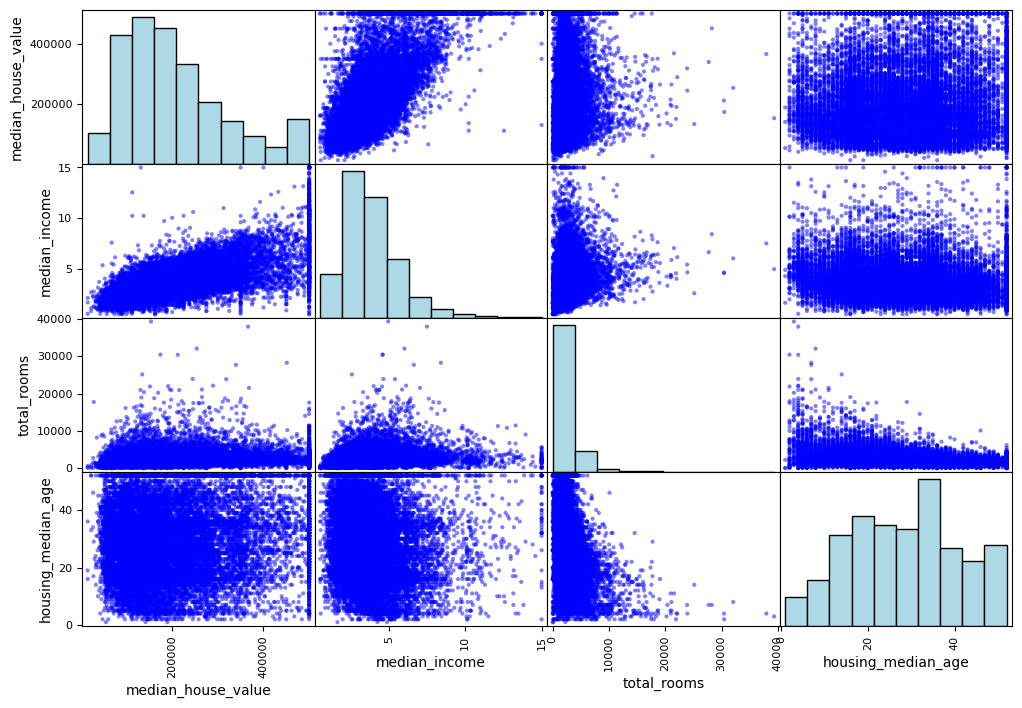

In [26]:
 from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize = (12,8) , color = "blue" ,diagonal="hist", hist_kwds={"color": "lightblue" ,"edgecolor" : "black"} )
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

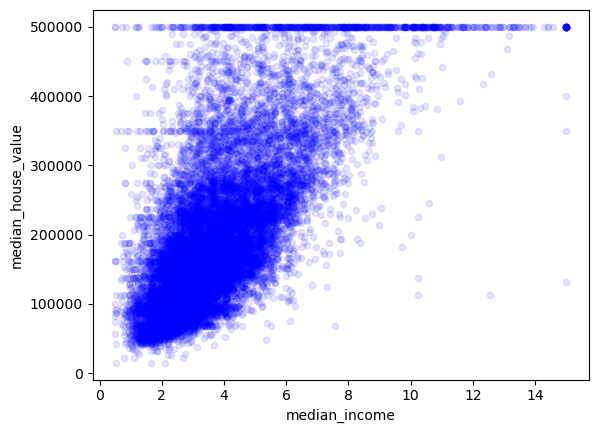

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1 , color = "blue")

In [28]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [29]:
corr_matx = housing.corr(numeric_only = True)
corr_matx["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [30]:
housing = strat_train_set.drop("median_house_value" , axis = 1)
housing_prices = strat_train_set["median_house_value"].copy()

housing_prices

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [32]:
x = imputer.transform(housing_num)


housing_tr = pd.DataFrame(x, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [35]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [36]:
housing_cat_encoded , housing_cat = housing_cat.factorize()

In [37]:
housing_cat_encoded

array([0, 1, 0, ..., 2, 2, 0])

In [38]:
housing_cat

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [39]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

hosuing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
hosuing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [40]:
hosuing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
 

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn .preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy = "median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
    ])

In [43]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names

    def fit(self , X , y = None):
        return self

    def transform(self , X):
        return  X[self.attribute_names].values

In [45]:
num_attributes = list(housing_num)
cat_attribute = ["ocean_proximity"]


num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attributes)),
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])

cat_pipeline = Pipeline([
 ('selector', DataFrameSelector(cat_attribute)),
 ('cat_encoder', OneHotEncoder()),
 ])


In [46]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline" , num_pipeline),
    ("cat_pipeline" , cat_pipeline)
])

In [78]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [48]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared , housing_prices)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
some_data = housing.iloc[:5]
actual_price = housing_prices.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)


In [50]:
print("Predictions : " , lin_reg.predict(some_data_prepared).tolist())
print("real_price  : " , actual_price.tolist())

Predictions :  [85657.90746764332, 305492.61994419014, 152056.4548143823, 186095.72236354667, 244550.67513714693]
real_price  :  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [51]:
from sklearn.metrics import mean_squared_error 
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_prices,housing_predictions)
float((np.sqrt(lin_mse)))

68627.87390018969

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared , housing_prices)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [53]:
hosuing_predictions_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_prices , hosuing_predictions_tree)
tree_mse
print("perdition:" , hosuing_predictions_tree.tolist()[:5])
print("actual   :" , housing_prices.tolist()[:5])
print("mean squared error : " ,tree_mse)

perdition: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
actual   : [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
mean squared error :  0.0


In [54]:
from sklearn.model_selection import cross_val_score
 
tree_scores = cross_val_score(tree_reg , housing_prepared , housing_prices , scoring = "neg_mean_squared_error" , cv = 10 )
tree_rmse_scorers = np.sqrt(-tree_scores)



In [55]:
def display_scores(scores):
    print("Scores :",scores)
    print("Mean Scorers : " ,scores.mean())
    print("Standard deviation : " , scores.std())

In [56]:
display_scores(tree_rmse_scorers)

Scores : [71966.91361234 70122.82117943 68634.49413217 71138.72293164
 70877.46328769 76831.90625851 70748.25670082 72413.77897628
 69073.59059221 70737.48147596]
Mean Scorers :  71254.54291470445
Standard deviation :  2157.3030951496266


In [57]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_prices,scoring="neg_mean_squared_error", cv=10)

In [58]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores : [71762.76429764 64114.99173738 67771.16815062 68635.19072263
 66846.14365202 72528.03726258 73997.08041739 68802.33585298
 66443.28834103 70139.80025395]
Mean Scorers :  69104.08006882166
Standard deviation :  2880.328214608285


In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared , housing_prices )


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
forest_scores = cross_val_score(forest_reg , housing_prepared , housing_prices , scoring = "neg_mean_squared_error" , cv = 10 , n_jobs=-1)


In [63]:
forest_pred = forest_reg.predict(housing_prepared)

forest_mse = np.sqrt(mean_squared_error(housing_prices , forest_pred))

forest_mse

np.float64(18655.03275710399)

In [64]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores : [51244.19589313 49413.85197518 46770.12825958 52159.05964772
 47108.17745887 51634.71647565 52229.43326451 49756.41745997
 48484.50988141 53512.53273854]
Mean Scorers :  50231.302305456746
Standard deviation :  2171.392010277763


In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg , param_grid , cv = 5 , scoring = "neg_mean_squared_error" , n_jobs=-1 )

grid_search.fit(housing_prepared,housing_prices)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,30


In [66]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=30)


In [67]:
 RandomForestRegressor(
     bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False
 )

,n_estimators,30
,criterion,'mse'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
cv_result = grid_search.cv_results_
for mean_score , params in zip(cv_result["mean_test_score"] , cv_result["params"]):
    print(np.sqrt(-mean_score) , params)

63565.82125174597 {'max_features': 2, 'n_estimators': 3}
55241.998062617924 {'max_features': 2, 'n_estimators': 10}
52599.0713348257 {'max_features': 2, 'n_estimators': 30}
60437.57544285129 {'max_features': 4, 'n_estimators': 3}
52785.267976181334 {'max_features': 4, 'n_estimators': 10}
50609.1703579049 {'max_features': 4, 'n_estimators': 30}
59684.95200268664 {'max_features': 6, 'n_estimators': 3}
52025.791848684195 {'max_features': 6, 'n_estimators': 10}
49995.04687299545 {'max_features': 6, 'n_estimators': 30}
58840.22572006256 {'max_features': 8, 'n_estimators': 3}
52162.80836926706 {'max_features': 8, 'n_estimators': 10}
50250.515625115135 {'max_features': 8, 'n_estimators': 30}
61949.3332776722 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54106.13014563291 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60188.39600333466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52898.368745425425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [71]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([6.71524528e-02, 6.29264267e-02, 4.56135494e-02, 1.74581119e-02,
       1.68909536e-02, 1.70595982e-02, 1.64213732e-02, 3.68360430e-01,
       5.67462609e-02, 1.11701289e-01, 6.78833194e-02, 1.25626115e-02,
       1.30343216e-01, 3.03911108e-05, 3.38646156e-03, 5.46355392e-03])

In [85]:
extra_attributes = ["rooms_per_hhold" , "pop_per_hhold" , "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attris = list(cat_encoder.categories_[0])
attributs = num_attributes + extra_attributes + cat_one_hot_attris
sorted(zip(feature_importance ,attributs) , reverse = True)

[(np.float64(0.3683604304560916), 'median_income'),
 (np.float64(0.1303432159625701), 'INLAND'),
 (np.float64(0.11170128934910807), 'pop_per_hhold'),
 (np.float64(0.06788331939009669), 'bedrooms_per_room'),
 (np.float64(0.06715245280178005), 'longitude'),
 (np.float64(0.06292642666773678), 'latitude'),
 (np.float64(0.05674626091318894), 'rooms_per_hhold'),
 (np.float64(0.04561354944568358), 'housing_median_age'),
 (np.float64(0.01745811190742197), 'total_rooms'),
 (np.float64(0.017059598195528186), 'population'),
 (np.float64(0.01689095359237674), 'total_bedrooms'),
 (np.float64(0.01642137323960299), 'households'),
 (np.float64(0.012562611485943514), '<1H OCEAN'),
 (np.float64(0.005463553923956194), 'NEAR OCEAN'),
 (np.float64(0.003386461558161557), 'NEAR BAY'),
 (np.float64(3.0391110753122034e-05), 'ISLAND')]

In [92]:
final_model = grid_search.best_estimator_
final_model

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [96]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(48258.12928884529)

In [104]:
print(X_test_prepared[:5])
print(final_predictions[:5])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 60 stored elements and shape (5, 16)>
  Coords	Values
  (0, 0)	0.5922942233801313
  (0, 1)	-0.710658033661602
  (0, 2)	0.02756357138483158
  (0, 3)	1.7885079854140071
  (0, 4)	1.1637481846888034
  (0, 5)	0.6850955364691826
  (0, 6)	1.2323847422659238
  (0, 7)	2.312866057254504
  (0, 8)	0.4882871803958229
  (0, 9)	-0.07091122365136206
  (0, 10)	-0.8681356261183203
  (0, 11)	1.0
  (1, 0)	-0.42180958913448313
  (1, 1)	-0.35049118982817357
  (1, 2)	-0.3700685190453078
  (1, 3)	-0.2817776013363016
  (1, 4)	-0.5524412176467921
  (1, 5)	-0.50616042712924
  (1, 6)	-0.569657918434862
  (1, 7)	0.5953235835295855
  (1, 8)	0.649943428102698
  (1, 9)	-0.006497299332353073
  (1, 10)	-0.9445341994279929
  (1, 11)	1.0
  (2, 0)	0.5623207116801908
  :	:
  (2, 11)	1.0
  (3, 0)	0.7371661965965078
  (3, 1)	-0.8088853547070824
  (3, 2)	0.5047220799009988
  (3, 3)	-0.4534050714825323
  (3, 4)	-0.5086236158850321
  (3, 5)	-0.31165136460037796
  (3,